# Keras Project

## The data

I will be using a subset of the LendingClub DataSet, which can be found on Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

NOTE: I am using a special version of this file, which has some extra feature engineering required.

*LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.*

## The goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

## Data overview

-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

----

## Loading the data and other imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
%matplotlib inline

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [7]:
#Function that prints feature information (for a specific column)
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


In [112]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis
*Since we will be attempting to predict loan_status, I will first create some plots to get an overview of the data*

<AxesSubplot:xlabel='loan_status', ylabel='count'>

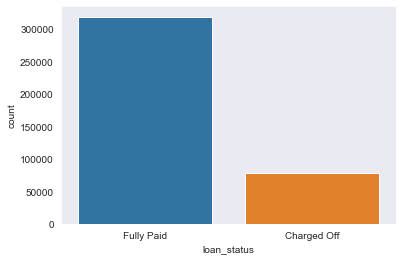

In [13]:
#How many have paid of their loan - unbalanced problem
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

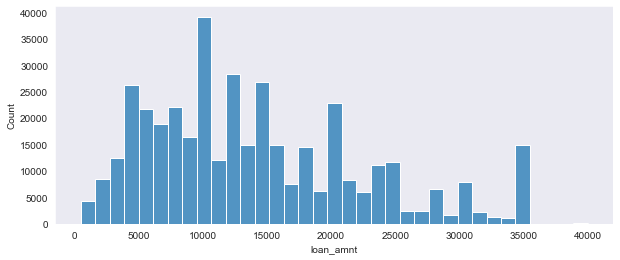

In [24]:
#Loan amounts - spikes at 'even' amounts, makes sense for standard loans.
plt.figure(figsize=(10,4))
sns.histplot(df['loan_amnt'],kde=False,bins=35)

<AxesSubplot:>

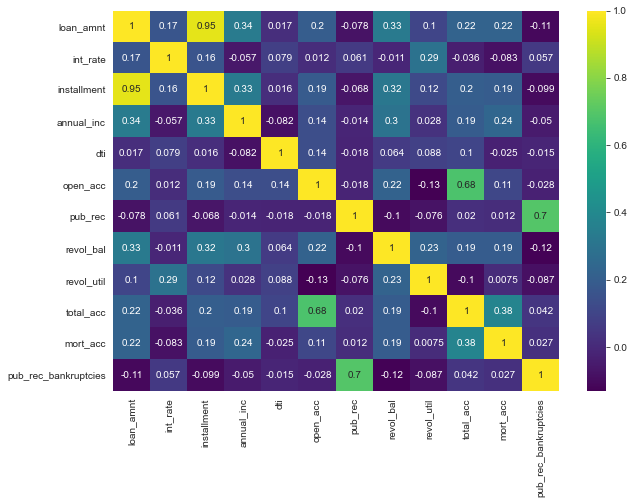

In [27]:
#Heatmap for all variables
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [55]:
#Near perfect correlation between 'installment' and 'loan amount'.
#Let's take a look at that.
feat_info('installment')
print('\n')
feat_info('loan_amnt')
#This is likely due to similar formulas applied to all loan amounts.

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

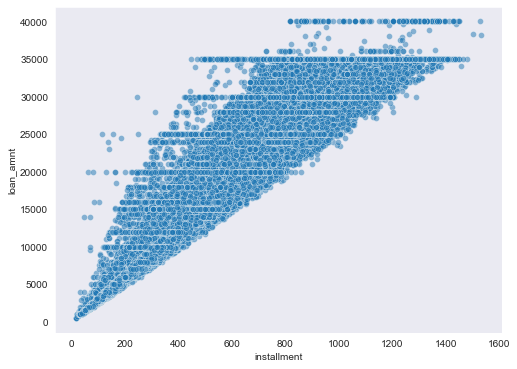

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df,alpha=0.5)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

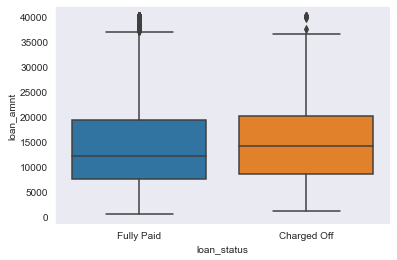

In [32]:
#Loan amount is not a great indicator
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [33]:
#Averages for loans not paid off are a little higher
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [34]:
#Let's look at the Grade and SubGrade columns that LendingClub attributes to the loans.
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [35]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

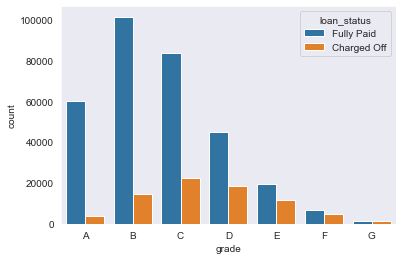

In [45]:
#Countplot per grade with hue set to the loan_status label

grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order=grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

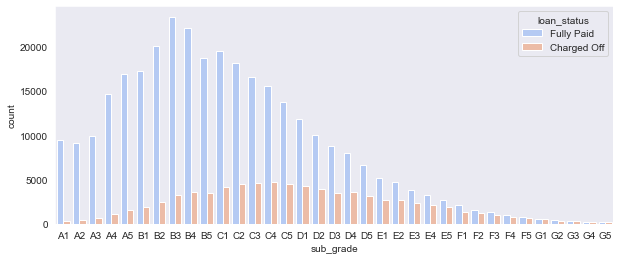

In [44]:
#Countplot for subgrades

plt.figure(figsize=(10,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,
              hue='loan_status',palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

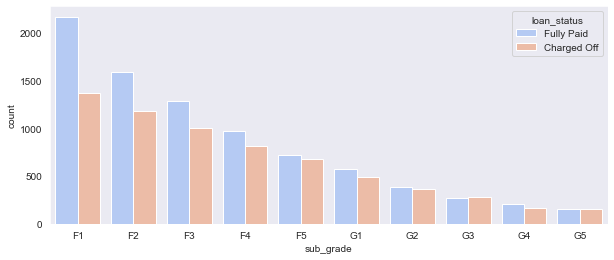

In [46]:
#Looks like F and G subgrades don't get paid back that often
#Let's isloate those and recreate the countplot for those

f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(10,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,
              hue='loan_status',palette='coolwarm')

In [113]:
#Creating a dummy variable in a new column called 'loan_repaid'
#with 1 if the loan status was "Fully Paid" and 0 if it was "Charged Off".
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

<AxesSubplot:>

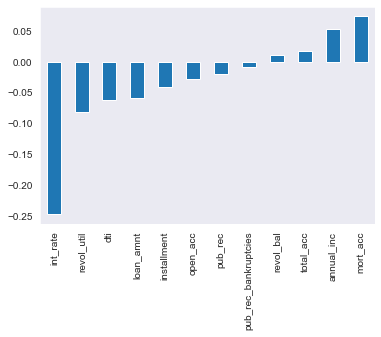

In [49]:
#Bar plot showing the correlation between the numeric features and the new loan_repaid column..
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2: Data PreProcessing
*Time to remove or fill any missing data, remove unnecessary or repetitive features and convert categorical string features to dummy variables.*

In [50]:
#Dealing with null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [51]:
#Relative number of null values per column
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [54]:
#We have a few notable ones that we need to check out.
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [56]:
df['emp_title'].nunique()

173105

In [57]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
A/R,ETC                               1
Hospital manager                      1
Retired from Verizon New Jersey       1
MTA Staten Island Railway             1
SAP BASIS SYSTEM ADMIN                1
Name: emp_title, Length: 173105, dtype: int64

In [114]:
#Way too many titles to profitable convert these to dummy variables.
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [61]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [62]:
emp_length_order = [ '< 1 year','1 year','2 years',
                     '3 years','4 years','5 years',
                     '6 years','7 years','8 years',
                     '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

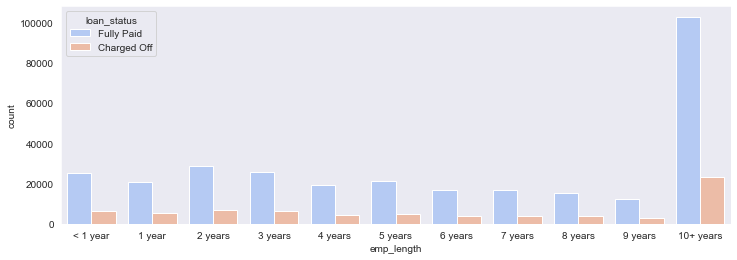

In [65]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,
              order=emp_length_order,hue='loan_status',palette='coolwarm')

In [70]:
#This still doesn't really inform us if there is a strong relationship 
#between employment length and being charged off, 
#what we want to know is the percentage of charge offs per category.

emp_charged = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [68]:
emp_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [74]:
emp_len = emp_charged/(emp_charged+emp_paid)

<AxesSubplot:xlabel='emp_length'>

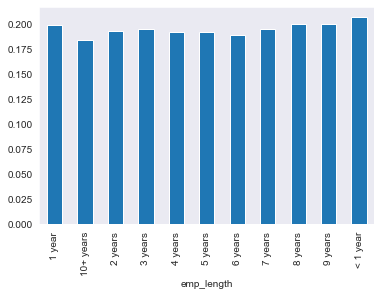

In [75]:
#Values are extremely similar across employment length, hence we can drop the column
emp_len.plot(kind='bar')

In [115]:
df = df.drop('emp_length',axis=1)

In [77]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [81]:
#The title column seems to be very similar (even duplicate) of the purpose column.
feat_info('title')
print('\n')
feat_info('purpose')

The loan title provided by the borrower


A category provided by the borrower for the loan request. 


In [116]:
df = df.drop('title',axis=1)

In [83]:
#Let's find out what the mort_acc represents.
feat_info('mort_acc')

Number of mortgage accounts.


In [89]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [87]:
#We have just over 10% missing values in the mort_acc column
100* 37795 / df['mort_acc'].value_counts().sum()

10.550337069242257

In [90]:
#Let's see if we can fill in the missing values in a meaningful way
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [117]:
#The total_acc column correlates (unsurprisingly) with the mort_acc
total_acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [94]:
def fill_mort_acc(total_acc,mort_acc):
    """
    Function that will fill in the average mortage accounts based on the number
    of total accounts, otherwise just returns the number of mortgage accounts
    """
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [118]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [99]:
df['mort_acc'].isnull().sum()

0

In [119]:
#Now let's see what missing values remain.
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [120]:
# Since the remaining missing values in revol_util and pub_rec_bankruptcies
#account for less than 0.5% of the total data. We can just remove those rows

df = df.dropna()

In [121]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [103]:
#That's it for the missing data.
#Now it's time to look at the categorical variables.
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [104]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [111]:
df['term'].value_counts()

Series([], Name: term, dtype: int64)

In [122]:
#We can easily convert these into integers.
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [123]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [125]:
#We already know that grade fits into sub_grade, hence we can drop grade
df = df.drop('grade',axis=1)

In [126]:
#We can then convert the sub grades into dummy variables and update our dataframe.
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [127]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [129]:
#verification_status, application_type,initial_list_status,purpose can all
#be converted into dummy variables - since they all very few categories.
dummies = pd.get_dummies(df[['verification_status','application_type'
                            ,'initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type'
                            ,'initial_list_status','purpose'],axis=1),dummies],axis=1)

In [132]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [133]:
#Since we have very few in none and any we can go ahead put these in the other category
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [136]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [137]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [138]:
#Now we can convert these to summy variables, just like above
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [139]:
#We can feature engineer a zip code column from the address in the data set. 
#We create a column called 'zip_code' that extracts the zip code from the address column
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [140]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [141]:
#We can then turn these into dummy variables as well
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [142]:
#We can now drop the address columns, since it no longers has any unique data
df = df.drop('address',axis=1)

In [143]:
#Looking at issue_d
feat_info('issue_d')

The month which the loan was funded


In [145]:
#Including this would be data leakage, we wouldn't know beforehand whether or not 
#a loan would be issued when using our model, so we can drop this feature.
df = df.drop('issue_d',axis=1)

In [147]:
#earliest_cr_line is a historical time stamp feature.
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [148]:
#We can turn it into a continuous variable by extracting the year from
#this feature byt applying a function that converts it to a numeric feature
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [149]:
#Now we can split our data into a training and a test set
from sklearn.model_selection import train_test_split

In [150]:
#We can drop the load_status column we created earlier, since its a duplicate of 
#the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [151]:
df = df.drop('loan_status',axis=1)

In [153]:
#Set X and y variables to the .values of the features and label
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [154]:
#Since my PC doesn't have the best specs, I will be using a smaller sample of the df to save time.
df = df.sample(frac=0.2,random_state=101)
print(len(df))

79044


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scaler = MinMaxScaler()

In [158]:
X_train = scaler.fit_transform(X_train)

In [159]:
X_test = scaler.transform(X_test)

In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [164]:
#Now it is time to create our model - starting with 78 neurons, since that matches the number of features we have
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [165]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3029 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2659 - val_loss: 0.2643
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2637 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2619 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2611 - val_loss: 0.2623
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2606 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2597 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.258

# Section 3: Evaluating Model Performance.

*Finally we can evaluate our model and plot out the validation loss versus the training loss.*

In [166]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

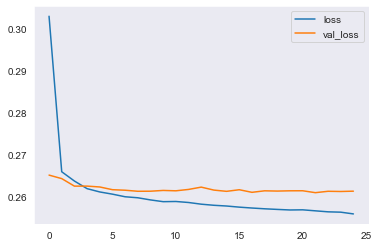

In [167]:
losses.plot()

In [168]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [172]:
#Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [173]:
#Confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 6841  8817]
 [  103 63283]]


In [174]:
#Given the random customer below, should we offer this person a loan?
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      10000.00
term              36.00
int_rate          10.25
installment      323.85
annual_inc     35300.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 180661, Length: 78, dtype: float64

In [176]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [177]:
new_customer

array([[0.23076923, 0.        , 0.19205298, 0.20078735, 0.0040544 ,
        0.00169617, 0.69565217, 0.08      , 0.01162791, 0.00236682,
        0.05435392, 0.18120805, 0.06561893, 0.125     , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [178]:
#Model predicts yes
(model.predict(new_customer) > 0.5).astype("int32")

array([[1]])

In [180]:
#Did they repay the loan? Yes
df.iloc[random_ind]['loan_repaid']

1.0